In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('asthma_data.txt')
data.head()

,ALF_PE,GNDR_CD,BMI,SMK_STATUS,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,EMER_ADM_LAST_12M,EMER_ADM_BEFORE_LAST_12M,ASTHMA_EXACERBATIONS,ASTHMA_REVIEWS,...,TOTAL_PRESCRIPTIONS,Income,Employment,Health,Education,Access_to_Services,Community_Safety,Physical_Environment,Housing,WIMD_2019_LSOA_CODES
0,58334qiB,0,46.6,No,6,4,0,7,1,2,...,10,1097,998,1347,1255,445,1656,1653,378,W01000002
1,30285EUD,1,34.4,No,6,2,1,6,0,4,...,7,483,607,450,620,628,392,1387,219,W01000003
2,25529abW,1,55.9,Yes,4,3,0,5,1,1,...,7,1110,948,1254,1158,338,1180,1789,1033,W01000004
3,66633xMA,0,27.0,No,7,4,1,7,0,3,...,8,1110,948,1254,1158,338,1180,1789,1033,W01000004
4,34294yWu,0,47.6,No,2,1,0,3,0,1,...,4,1019,1242,1571,964,909,1063,804,500,W01000005


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ALF_PE                    1500 non-null   object 
 1   GNDR_CD                   1500 non-null   int64  
 2   BMI                       1500 non-null   float64
 3   SMK_STATUS                1500 non-null   object 
 4   ASTHMA_GP_VISITS          1500 non-null   int64  
 5   TOTAL_ASTHMA_HOSP         1500 non-null   int64  
 6   EMER_ADM_LAST_12M         1500 non-null   int64  
 7   EMER_ADM_BEFORE_LAST_12M  1500 non-null   int64  
 8   ASTHMA_EXACERBATIONS      1500 non-null   int64  
 9   ASTHMA_REVIEWS            1500 non-null   int64  
 10  ASTHMA_OUTPATIENT_APPO    1500 non-null   int64  
 11  ASTHMA_RE_ADMISSIONS      1500 non-null   int64  
 12  TOTAL_PRESCRIPTIONS       1500 non-null   int64  
 13  Income                    1500 non-null   int64  
 14  Employme

In [4]:
#used gender, bmi, smoking status, emergency_admission in the last 12 months
regression_data = data[['GNDR_CD',
                      'BMI',
                      'SMK_STATUS',
                      'EMER_ADM_LAST_12M', 
                      'EMER_ADM_BEFORE_LAST_12M', 
                      ]].copy()

In [5]:
#asthma outcomes
cluster_data = data[['ASTHMA_GP_VISITS', 
                        'TOTAL_ASTHMA_HOSP',
                        'ASTHMA_REVIEWS',
                        'ASTHMA_OUTPATIENT_APPO',
                        'TOTAL_PRESCRIPTIONS',
                        'ASTHMA_RE_ADMISSIONS',
                        'ASTHMA_EXACERBATIONS',
                        ]].copy()

# CLUSTERING

In [6]:
cluster_data

,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,ASTHMA_REVIEWS,ASTHMA_OUTPATIENT_APPO,TOTAL_PRESCRIPTIONS,ASTHMA_RE_ADMISSIONS,ASTHMA_EXACERBATIONS
0,6,4,2,3,10,1,1
1,6,2,4,0,7,2,0
2,4,3,1,2,7,0,1
3,7,4,3,1,8,0,0
4,2,1,1,1,4,1,0
...,...,...,...,...,...,...,...
1495,7,4,3,1,8,0,0
1496,3,2,1,1,4,0,0
1497,3,1,2,0,6,0,1
1498,5,4,0,3,9,1,0


##### preprocessing: standardization to numerical features

In [7]:
from sklearn.preprocessing import MinMaxScaler #using MinMaxScaler

In [8]:
scaler = MinMaxScaler() #an instance of MinMaxScaler class

In [9]:
cluster_data_prepared = scaler.fit_transform(cluster_data) #applying MinMaxScaler

In [10]:
#view preprocessed data in dataframe
df_cluster_prepared = pd.DataFrame(cluster_data_prepared,columns=cluster_data.columns)
df_cluster_prepared

,ASTHMA_GP_VISITS,TOTAL_ASTHMA_HOSP,ASTHMA_REVIEWS,ASTHMA_OUTPATIENT_APPO,TOTAL_PRESCRIPTIONS,ASTHMA_RE_ADMISSIONS,ASTHMA_EXACERBATIONS
0,0.428571,0.4,0.285714,0.6,0.6250,0.333333,0.25
1,0.428571,0.2,0.571429,0.0,0.4375,0.666667,0.00
2,0.285714,0.3,0.142857,0.4,0.4375,0.000000,0.25
3,0.500000,0.4,0.428571,0.2,0.5000,0.000000,0.00
4,0.142857,0.1,0.142857,0.2,0.2500,0.333333,0.00
...,...,...,...,...,...,...,...
1495,0.500000,0.4,0.428571,0.2,0.5000,0.000000,0.00
1496,0.214286,0.2,0.142857,0.2,0.2500,0.000000,0.00
1497,0.214286,0.1,0.285714,0.0,0.3750,0.000000,0.25
1498,0.357143,0.4,0.000000,0.6,0.5625,0.333333,0.00


In [11]:
#using kmeans clsutering to create clusters based on clinical outcomes of patients
from sklearn.cluster import KMeans 

##### checking the number of appropriate clusters


##### 1. using inertia


In [12]:
inertia = []

for i in range(2,8):
    kmeans_inertia = KMeans(n_clusters=i)
    kmeans_inertia.fit(cluster_data_prepared)
    inertia.append(kmeans_inertia.inertia_)
    
print(f"Inertia: {inertia}")

Inertia: [254.9665784843612, 222.436141676389, 199.1741385895074, 179.19799056613587, 163.6631173445084, 151.5927448724042]


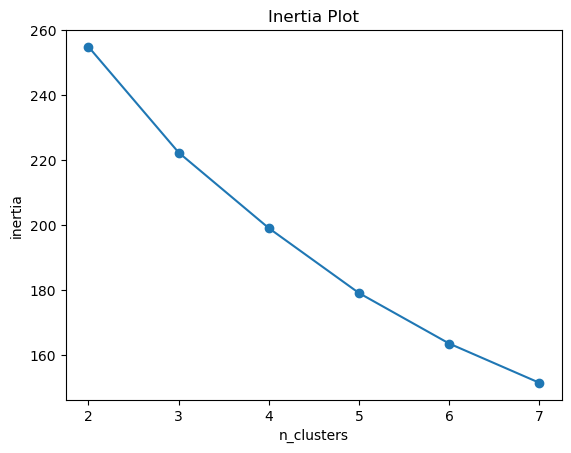

In [13]:
plt.scatter(range(2,8), inertia)
plt.plot(range(2,8), inertia)
plt.title('Inertia Plot')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

##### 2. using silhouette scores

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette = []

for s in range(2,8):
    kmeans_silhouette = KMeans(n_clusters=s)
    kmeans_silhouette.fit(cluster_data_prepared)
    silhouette.append(silhouette_score(cluster_data_prepared, kmeans_silhouette.labels_, metric='euclidean'))

print(f"Silhouette_scores: {silhouette}")

Silhouette_scores: [0.20821796350155422, 0.19625458508267316, 0.19924120836430484, 0.1949429942303074, 0.18314539020633802, 0.1693662284075137]


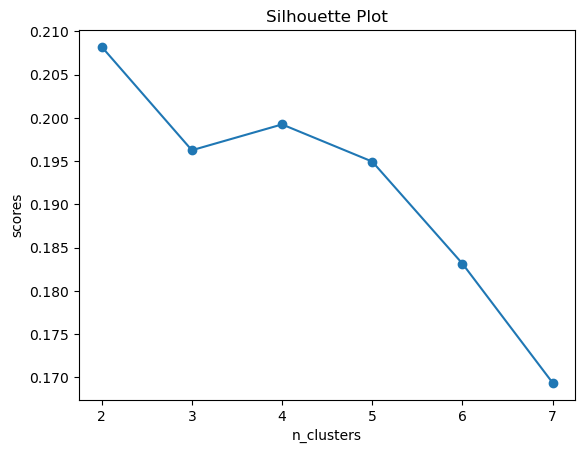

In [16]:
plt.scatter(range(2,8), silhouette)
plt.plot(range(2,8), silhouette)
plt.title('Silhouette Plot')
plt.xlabel('n_clusters')
plt.ylabel('scores')
plt.show()

2 clusters indicated by the silhouette scores

##### choosing 2 clusters

In [17]:
k_means = KMeans(n_clusters=2) #using 2 clusters

In [18]:
k_means.fit(cluster_data_prepared)

KMeans(n_clusters=2)

In [19]:
cluster_predictions = k_means.predict(cluster_data_prepared) #prediction of clusters 

In [20]:
#number of observations in clusters
pd.Series(cluster_predictions).value_counts()

0    821
1    679
dtype: int64

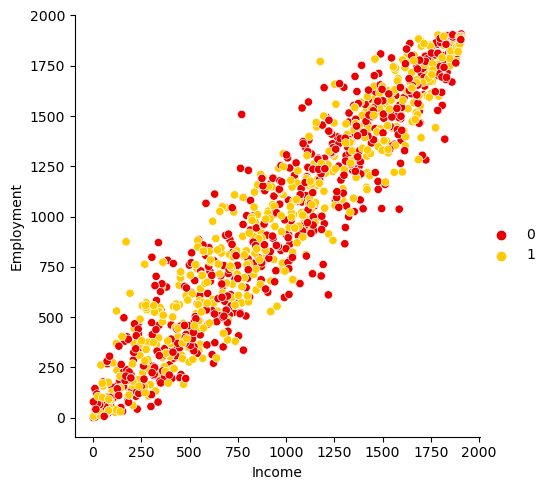

In [21]:
sns.relplot(data=data, kind='scatter', x='Income', y='Employment', hue=cluster_predictions, palette='hot')
plt.show()

#no apparent clusters using variables

# Using PCA to visualize

In [22]:
from sklearn.decomposition import PCA

In [23]:
#explaining 80 percent of the variance
pca_0 = PCA(0.9)

In [24]:
cluster_pca = pca_0.fit_transform(cluster_data_prepared)

In [25]:
cluster_pca.shape

(1500, 5)

In [26]:
df_pca = pd.DataFrame(cluster_pca, columns=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5'])
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,0.352127,0.320610,0.142772,-0.007723,0.151718
1,0.215979,-0.397726,0.126218,-0.149774,0.517707
2,-0.031351,0.228762,0.004135,0.076922,-0.082729
3,0.219452,-0.133343,-0.081449,-0.119814,-0.145061
4,-0.283483,-0.024208,0.142062,-0.148788,0.249211


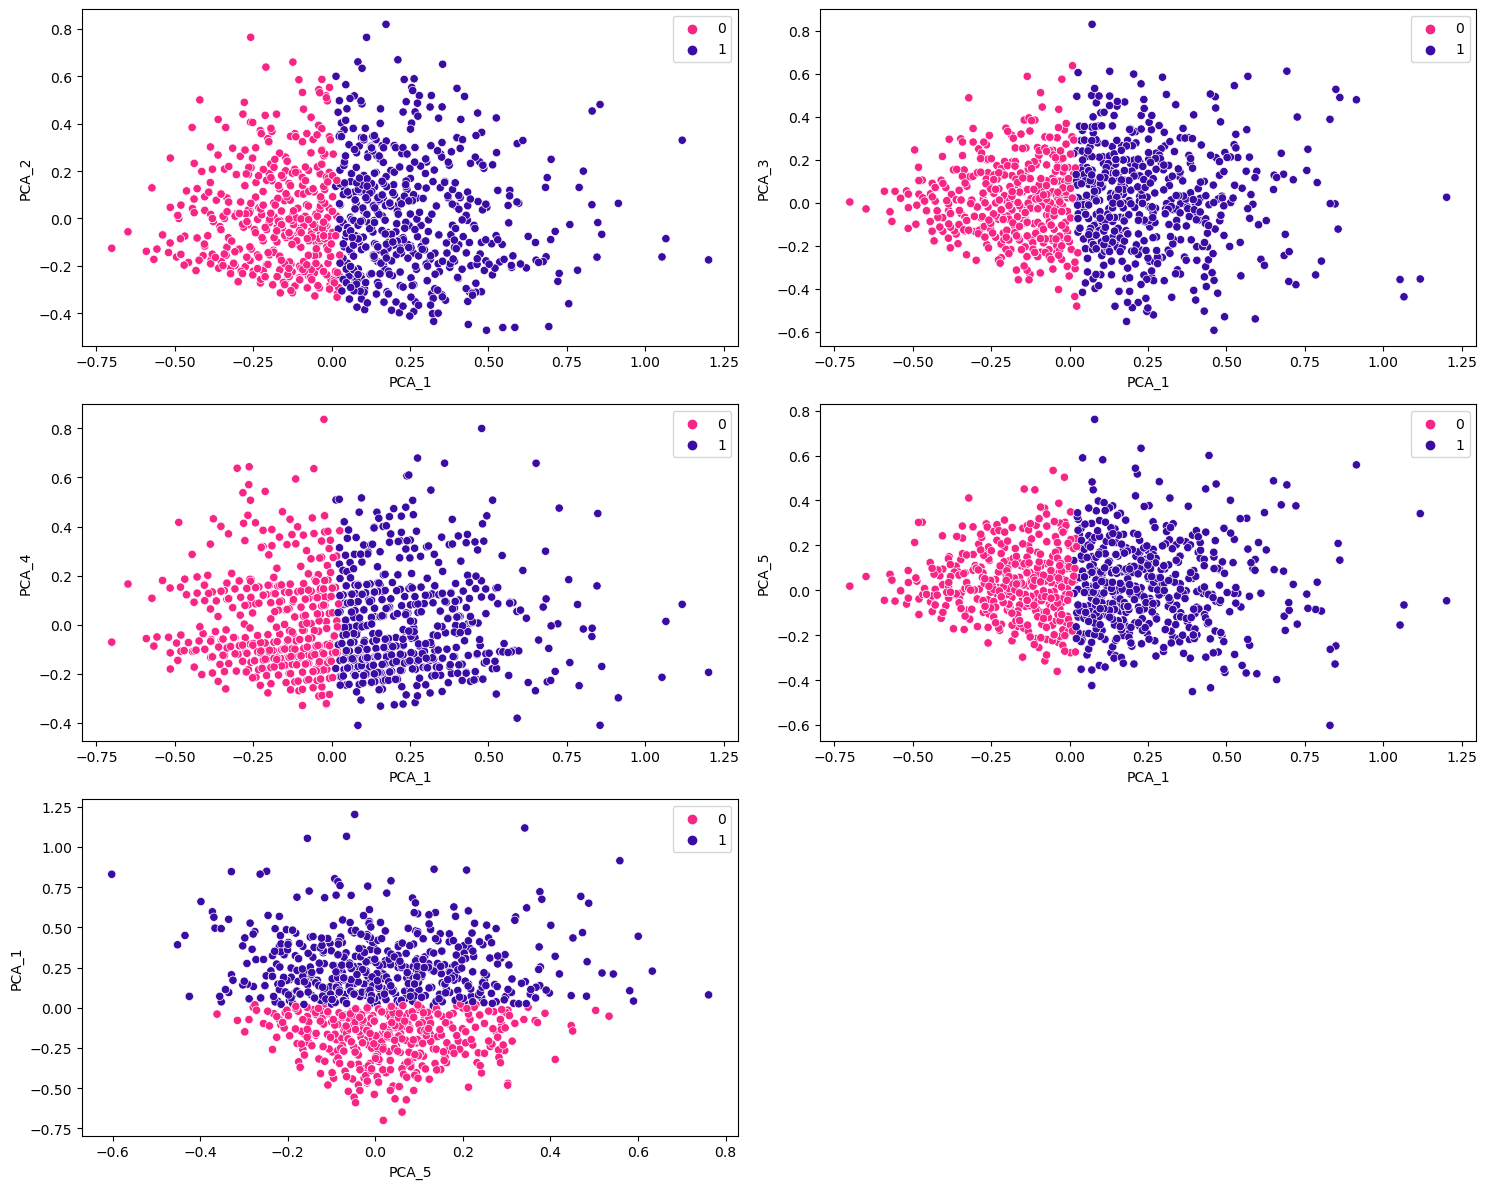

In [27]:
fig, ax = plt.subplots(3,2, figsize=(15,12))
sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_2', hue=cluster_predictions,ax=ax[0,0], palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_3', hue=cluster_predictions,ax=ax[0,1],palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_4', hue=cluster_predictions,ax=ax[1,0],palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_1', y = 'PCA_5', hue=cluster_predictions,ax=ax[1,1],palette=['#F72585','#3A0CA3'])

sns.scatterplot(data=df_pca, x = 'PCA_5', y = 'PCA_1', hue=cluster_predictions,ax=ax[2,0],palette=['#F72585','#3A0CA3'])

ax[2,1].axis('off')
plt.tight_layout()
plt.show()

##### summary statistics of clusters

In [28]:
data['predcitions'] = cluster_predictions

In [29]:
#Number observations per cluster
data['predcitions'].value_counts()

0    821
1    679
Name: predcitions, dtype: int64

In [30]:

summary_stats = data.groupby('predcitions').agg({
                             'ASTHMA_GP_VISITS':['count','min','max','mean','median'],
                             'TOTAL_ASTHMA_HOSP':['min','max','mean','median'], 
                             'EMER_ADM_LAST_12M':['min','max','mean','median'], 
                             'EMER_ADM_BEFORE_LAST_12M':['min','max','mean','median'], 
                             'ASTHMA_EXACERBATIONS':['count','min','max','mean','median'], 
                             'ASTHMA_REVIEWS':['count','min','max','mean','median'],
                             'ASTHMA_OUTPATIENT_APPO':['min','max','mean','median'],
                             'ASTHMA_RE_ADMISSIONS':['min','max','mean','median'],
                             'TOTAL_PRESCRIPTIONS':['min','max','mean','median'],
                             'Income':['count','min','max','mean','median'],
                            'Employment':['min','max','mean','median'],
                            'Health':['min','max','mean','median'],
                            'Education':['count','min','max','mean','median'],
                            'Access_to_Services':['min','max','mean','median'],
                            'Community_Safety':['min','max','mean','median'],
                            'Physical_Environment':['min','max','mean','median'],
                            'Housing':['min','max','mean','median']
                                
                                }).T

In [31]:
print(summary_stats.loc[['Income','Employment','Housing','Health'],:]) 

predcitions                  0            1
Income     count    821.000000   679.000000
           min        1.000000     1.000000
           max     1908.000000  1909.000000
           mean     947.479903   975.055965
           median   960.000000   984.000000
Employment min        1.000000     1.000000
           max     1908.000000  1903.000000
           mean     939.873325   978.026510
           median   929.000000  1007.000000
Housing    min        4.000000     2.000000
           max     1909.000000  1909.000000
           mean     957.839220   961.593520
           median  1019.000000   964.000000
Health     min        1.000000     1.000000
           max     1906.000000  1909.000000
           mean     930.738124   961.913108
           median   954.000000   949.000000


In [32]:
print(summary_stats.loc[['Education','Access_to_Services','Community_Safety','Physical_Environment'],:])

predcitions                            0            1
Education            count    821.000000   679.000000
                     min       11.000000     2.000000
                     max     1908.000000  1905.000000
                     mean     945.991474   970.740795
                     median   960.000000   944.000000
Access_to_Services   min        1.000000    11.000000
                     max     1907.000000  1909.000000
                     mean     971.450670   968.452135
                     median  1016.000000   981.000000
Community_Safety     min        2.000000     1.000000
                     max     1907.000000  1908.000000
                     mean     946.049939   944.207658
                     median   959.000000   926.000000
Physical_Environment min        1.000000     2.000000
                     max     1908.000000  1909.000000
                     mean     947.866017   941.228277
                     median   941.000000   957.000000


In [33]:
print(summary_stats.loc[['ASTHMA_GP_VISITS','TOTAL_ASTHMA_HOSP','EMER_ADM_LAST_12M','EMER_ADM_BEFORE_LAST_12M'],:]) 

predcitions                               0           1
ASTHMA_GP_VISITS         count   821.000000  679.000000
                         min       0.000000    3.000000
                         max       6.000000   14.000000
                         mean      3.315469    6.413844
                         median    3.000000    6.000000
TOTAL_ASTHMA_HOSP        min       0.000000    0.000000
                         max       6.000000   10.000000
                         mean      1.974421    3.695140
                         median    2.000000    4.000000
EMER_ADM_LAST_12M        min       0.000000    0.000000
                         max       4.000000    5.000000
                         mean      0.705238    1.216495
                         median    1.000000    1.000000
EMER_ADM_BEFORE_LAST_12M min       0.000000    2.000000
                         max       7.000000   14.000000
                         mean      3.540804    6.419735
                         median    4.000000    6

In [34]:
print(summary_stats.loc[['ASTHMA_EXACERBATIONS',
                         'ASTHMA_REVIEWS',
                         'ASTHMA_OUTPATIENT_APPO',
                         'ASTHMA_RE_ADMISSIONS','TOTAL_PRESCRIPTIONS'],:]) 

predcitions                             0           1
ASTHMA_EXACERBATIONS   count   821.000000  679.000000
                       min       0.000000    0.000000
                       max       4.000000    4.000000
                       mean      0.507917    0.625920
                       median    0.000000    0.000000
ASTHMA_REVIEWS         count   821.000000  679.000000
                       min       0.000000    0.000000
                       max       5.000000    7.000000
                       mean      1.222899    2.513991
                       median    1.000000    2.000000
ASTHMA_OUTPATIENT_APPO min       0.000000    0.000000
                       max       4.000000    5.000000
                       mean      0.930572    1.447717
                       median    1.000000    1.000000
ASTHMA_RE_ADMISSIONS   min       0.000000    0.000000
                       max       2.000000    3.000000
                       mean      0.175396    0.428571
                       media

### PREDICTING LAST_12 MONTHS OF EMERG_ADMIS
### BUILDING A MODEL USING PREVIOUS INPUTS TO PREDICT EMERG_ADMIS FOR NEXT YEAR
### CLUSTERS WILL BE USED A PREDICTORS

In [35]:
#add cluster predictions as independent variable 

regression_data['clusters'] = cluster_predictions
regression_data.head()

,GNDR_CD,BMI,SMK_STATUS,EMER_ADM_LAST_12M,EMER_ADM_BEFORE_LAST_12M,clusters
0,0,46.6,No,0,7,1
1,1,34.4,No,1,6,1
2,1,55.9,Yes,0,5,0
3,0,27.0,No,1,7,1
4,0,47.6,No,0,3,0


In [36]:
#cluster is a categorical variable
regression_data['clusters'] = regression_data['clusters'].astype('category')
regression_data['GNDR_CD'] = regression_data['GNDR_CD'].astype('category')
regression_data['SMK_STATUS'] = regression_data['GNDR_CD'].astype('category')
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   GNDR_CD                   1500 non-null   category
 1   BMI                       1500 non-null   float64 
 2   SMK_STATUS                1500 non-null   category
 3   EMER_ADM_LAST_12M         1500 non-null   int64   
 4   EMER_ADM_BEFORE_LAST_12M  1500 non-null   int64   
 5   clusters                  1500 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 40.0 KB


In [37]:
n_attribs = ['BMI',
             'EMER_ADM_BEFORE_LAST_12M',
             ]

c_attribs = ['clusters','GNDR_CD','SMK_STATUS']

In [38]:
#dropping the dependent variable EMER_ADM_LAST_12M

X = regression_data.drop('EMER_ADM_LAST_12M',axis=1).copy()
X.head(3)

,GNDR_CD,BMI,SMK_STATUS,EMER_ADM_BEFORE_LAST_12M,clusters
0,0,46.6,0,7,1
1,1,34.4,1,6,1
2,1,55.9,1,5,0


In [39]:
#the dependent variable: EMER_ADM_LAST_12M

y = regression_data[['EMER_ADM_LAST_12M']]
y = np.array(y).reshape(len(y),)
y

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [41]:
#using column transformer to get dummy variables for clusters and scale numerical values
col_transformer_reg =ColumnTransformer([('nAttr', MinMaxScaler(), n_attribs), 
                                        ('cAttr', OneHotEncoder(), c_attribs)])

X_prepared = col_transformer_reg.fit_transform(X)

In [42]:
#viewing the preprocessed data in a dataframe

regression__prep_df = pd.DataFrame(X_prepared, columns=col_transformer_reg.get_feature_names_out())
regression__prep_df.head()

,nAttr__BMI,nAttr__EMER_ADM_BEFORE_LAST_12M,cAttr__clusters_0,cAttr__clusters_1,cAttr__GNDR_CD_0,cAttr__GNDR_CD_1,cAttr__SMK_STATUS_0,cAttr__SMK_STATUS_1
0,0.515766,0.500000,0.0,1.0,1.0,0.0,1.0,0.0
1,0.378378,0.428571,0.0,1.0,0.0,1.0,0.0,1.0
2,0.620495,0.357143,1.0,0.0,0.0,1.0,0.0,1.0
3,0.295045,0.500000,0.0,1.0,1.0,0.0,1.0,0.0
4,0.527027,0.214286,1.0,0.0,1.0,0.0,1.0,0.0


In [43]:
#correlation for prepared data
corr_pre_data = regression__prep_df.corr()
mask = np.triu(np.ones_like(corr_pre_data))

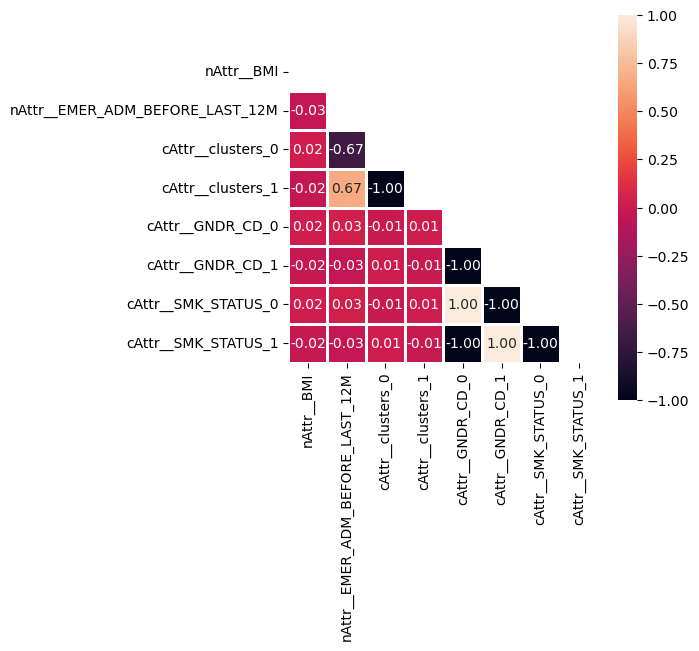

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_pre_data, annot=True, square=True, mask=mask, fmt='.2f',linecolor='white',linewidths=1)
plt.show()

#cluster 0 and 1 are highly correlated for prepared data

Dummy variables are correlated, however they are needed for this analysis so no variable will be removed.
The interpretation of the dummy variable is important to the analysis as i wish to know the influence of these predictors on the prediction of emergency admissions.

The clusters are also important as predictors to know if a cluster is associated with emergency admissions. This will aid in understanding the patients within a cluster.

# TRAIN & TEST SPLITS

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y,shuffle=True,test_size=0.3)

In [47]:
X_train.shape

(1050, 8)

In [48]:
y_train.shape

(1050,)

In [49]:
X_test.shape

(450, 8)

In [50]:
y_test.shape

(450,)

# applying algorithms

##### knn

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
#let us try knn first to see it's performance
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [55]:
knn_y_train_pred = knn.predict(X_train)
print(f"KNN MAE: {mean_absolute_error(y_train, knn_y_train_pred)}")

KNN MAE: 0.6161904761904762


##### svm

In [56]:
from sklearn.svm import SVR

In [57]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [59]:
svr_y_train_pred = svr.predict(X_train)
print(f"SVR MAE: {mean_absolute_error(y_train, svr_y_train_pred)}")

SVR MAE: 0.6922765726662166


##### decision tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
dec_y_train_pred = dec_tree.predict(X_train)
print(f"MAE DECISION TREE: {mean_absolute_error(y_train, dec_y_train_pred)}")

MAE DECISION TREE: 0.04285714285714286


##### random forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
ran_forest = RandomForestRegressor()
ran_forest.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
rfr_y_train_pred = ran_forest.predict(X_train)
print(f"MAE RANDOM FOREST: {mean_absolute_error(y_train, rfr_y_train_pred)}")

MAE RANDOM FOREST: 0.3032430612244898


##### xgboost

In [68]:
from xgboost import XGBRegressor

In [69]:
xg_boost = XGBRegressor()
xg_boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
xg_y_train_pred = xg_boost.predict(X_train)
print(f"MAE XGBOOST: {mean_absolute_error(y_train, xg_y_train_pred)}")

MAE XGBOOST: 0.2975392725767701


# important features for xgboost

In [72]:
import shap

In [73]:
shap.initjs()

In [74]:
explainer = shap.Explainer(xg_boost)

In [75]:
shap_values = explainer.shap_values(X_test)

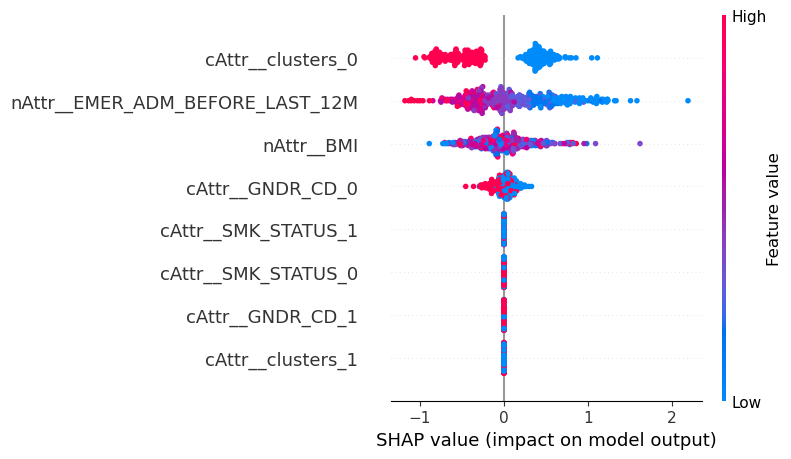

In [76]:
shap.summary_plot(shap_values, 
                  X_test,
                  feature_names=col_transformer_reg.get_feature_names_out())



#WHEN THE VALUE OF feature cluster_0 is 0, then there is a high impact on the model of 
#predicting admissions (HIGHER PREDICTED ADMISSIONS). 

#observations belonging to cluster_0 have a stronger negative impact on predicting admission.
#observations NOT belonging to cluster_0 have a stronger positive impact on predicting admission.

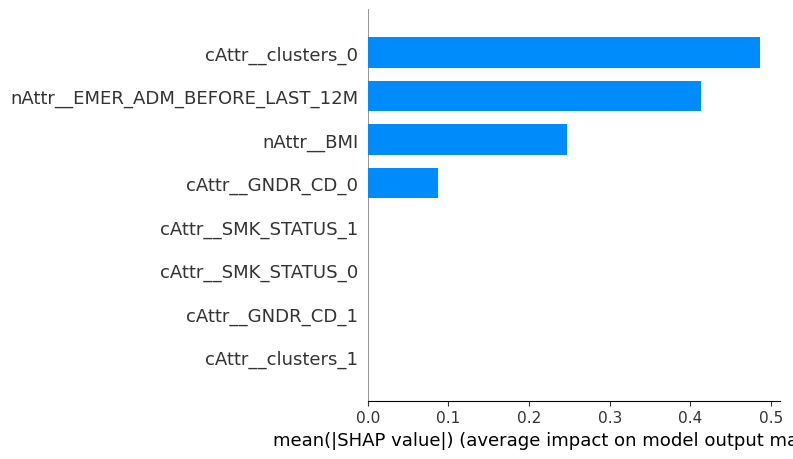

In [77]:
shap.summary_plot(shap_values, 
                  X_test,
                  feature_names=col_transformer_reg.get_feature_names_out(), 
                  plot_type='bar')

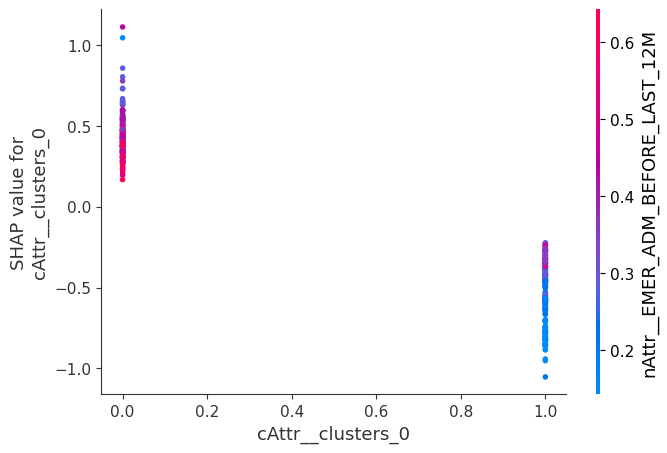

In [78]:
shap.dependence_plot(ind='cAttr__clusters_0',shap_values=shap_values,
                    features=X_test,
                    feature_names=col_transformer_reg.get_feature_names_out()
                    )

#WHEN EMERG_ADM_BEFORE_LAST_12MONTHS ARE LOW, THEY TEND TO BELONG TO CLUSTER_0